In [89]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Paired')
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import time
import random
import scipy
import pandas as pd
import os, sys
reload(sys)  # Reload does the trick!
sys.setdefaultencoding('UTF8')

%matplotlib inline

# Load data files

In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [82]:
def generate_df(beta="0.5", V="0.01", RCP='4.5', region = 'Caribbean'):
    if region == 'Caribbean':
        D = np.load("./Caribbean/input/D_Caribbean_revised.npy").T
        Area = np.load("./Caribbean/input/Caribbean_reef_areas.npy")
        N0 = np.load("./output/Caribbean/N_hindcast_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_H_0.npy")
        Z0 = np.load("./output/Caribbean/Z_hindcast_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_H_0.npy")
        egvec_cent = np.load("./patch_metrics/Carib_egvec.npy")
        bw_cent = np.load("./patch_metrics/Carib_bw.npy")
        year_H = np.load("./output/Caribbean/year_hindcast_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_H_0.npy")
        region = [1] * 423

        if RCP == '4.5':
            SST = np.load("./Caribbean/input/Caribbean_sst45_yearly_GISS.npy")
            N1 = np.load("./output/Caribbean/N_forecast1_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_45_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/Caribbean/Z_forecast1_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_45_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/Caribbean/year_forecast1_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_45_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            
        elif RCP == '8.5':
            SST = np.load("./Caribbean/input/Caribbean_sst85_yearly_GISS.npy")
            N1 = np.load("./output/Caribbean/N_forecast2_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_85_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/Caribbean/Z_forecast2_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_85_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/Caribbean/year_forecast2_Caribbean_beta_"+beta+"_V_"+V+"_mpa_0.0_algmax_1.0_85_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            
    elif region == 'SWP':
        D = np.load("./SouthwestPacific/input/D_SWP_2001_revised.npy").T
        Area = np.load("./SouthwestPacific/input/SWP_reef_area.npy")
        N0 = np.load("./output/SWP/N_hindcast_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_H_0.npy")
        Z0 = np.load("./output/SWP/Z_hindcast_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_H_0.npy")
        egvec_cent = np.load("./patch_metrics/SWP_egvec.npy")
        bw_cent = np.load("./patch_metrics/SWP_bw.npy")
        year_H = np.load("./output/SWP/year_hindcast_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
        region = [2] * 583

        if RCP == '4.5':
            SST = np.load("./SouthwestPacific/input/SWP_SST_45_yearly.npy")
            N1 = np.load("./output/SWP/N_forecast1_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/SWP/Z_forecast1_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/SWP/year_forecast1_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            
        elif RCP == '8.5':
            SST = np.load("./SouthwestPacific/input/SWP_SST_85_yearly.npy")
            N1 = np.load("./output/SWP/N_forecast2_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/SWP/Z_forecast2_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/SWP/year_forecast2_SWP_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            
    elif region == 'CT':
        D = np.load("./CoralTriangle/input/D_Indo_2083_diag.npy").T
        Area = np.load("./CoralTriangle/input/Indonesia_reef_area_2083.npy")
        N0 = np.load("./output/CT/N_hindcast_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_H_0.npy")
        Z0 = np.load("./output/CT/Z_hindcast_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_H_0.npy")
        egvec_cent = np.load("./patch_metrics/Indo_egvec.npy")
        bw_cent = np.load("./patch_metrics/Indo_bw.npy")
        year_H = np.load("./output/CT/year_hindcast_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
        region = [3] * 2083

        if RCP == '4.5':
            SST = np.load("./CoralTriangle/input/Indonesia_SST_45_yearly_obs_2083.npy")
            N1 = np.load("./output/CT/N_forecast1_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/CT/Z_forecast1_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/CT/year_forecast1_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_45_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            
        elif RCP == '8.5':
            SST = np.load("./CoralTriangle/input/Indonesia_SST_85_yearly_obs_2083.npy")
            N1 = np.load("./output/CT/N_forecast2_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            N = np.concatenate((N0,N1),axis=0)
            Z1 = np.load("./output/CT/Z_forecast2_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            Z = np.concatenate((N0,N1),axis=0)
            year_F = np.load("./output/CT/year_forecast2_CT_beta_"+beta+"_V_"+V+"_mpa_none0.0_algmax_1.0_85_0.npy")
            year = np.concatenate((year_H,year_F+148),axis=0)
            

    mismatch_ts1 = np.zeros((SST.shape))
    for j in np.arange(0,SST.shape[1]):#For each time step
        for i in np.arange(0,SST.shape[0]): #For each site
            delta = SST[:,j] - SST[i,j]
            delta_D = delta*D[i,:] * Area/Area[i]
            delta_ave = delta_D.sum()/D.shape[0]
            mismatch_ts1[i,j] = delta_ave

    ITM = np.mean(mismatch_ts1[:,138:149], axis = 1)
    
    pr05 = np.zeros((SST.shape[0]))
    for i in np.arange(0,SST.shape[0]): #For each site
        delta = np.mean(SST[:,138:149], axis=1) - np.mean(SST[i,139:149])
        ID = np.where(delta >= 0.5)
        D_input = D[i,:]
        D_sum = D_input.sum()
        D_sum_ID = D_input[ID].sum()
        pr05[i] = D_sum_ID/D_sum
        
    LR = []
    SR = []
    DS = []
    for i in np.arange(0,D.shape[0]): # 0 to number of sites in region (423,583,2083)
        LR.append(D[i,i]/D[i,:].sum())
        SR.append(D[i,i]/D[:,i].sum())
        DS.append(D[i,:].sum())

    iSST = np.mean(SST[:,138:149], axis = 1)
    delta_SST = np.mean(SST[:,420:431], axis = 1) - np.mean(SST[:,138:149], axis = 1)

    N_all = N[:,:,0]+N[:,:,1]
    min_cover = N_all.min(axis = 0)

    columns_order = ['iSST', 'deltaSST','LR', 'SR', 'DS', 'bw_cent', 'egvec_cent','ITM','pr05','Area','region','min_cover']

    df = pd.DataFrame({'deltaSST': delta_SST, 'iSST': iSST,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover, 'pr05': pr05}, columns = columns_order)
    
    return df

In [86]:
os.chdir('/Users/pinskylab/Documents/GitHub/Regional_Coral/')

#create all dataframes
#Caribbean
df_Carib45_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'Caribbean', RCP = '4.5')
df_Carib45_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'Caribbean', RCP = '4.5')
df_Carib45_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'Caribbean', RCP = '4.5')
df_Carib45_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'Caribbean', RCP = '4.5')
df_Carib45_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'Caribbean', RCP = '4.5')
df_Carib45_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'Caribbean', RCP = '4.5')
df_Carib45_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'Caribbean', RCP = '4.5')
df_Carib45_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'Caribbean', RCP = '4.5')
df_Carib45_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'Caribbean', RCP = '4.5')
df_Carib85_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'Caribbean', RCP = '8.5')
df_Carib85_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'Caribbean', RCP = '8.5')
df_Carib85_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'Caribbean', RCP = '8.5')
df_Carib85_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'Caribbean', RCP = '8.5')
df_Carib85_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'Caribbean', RCP = '8.5')
df_Carib85_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'Caribbean', RCP = '8.5')
df_Carib85_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'Caribbean', RCP = '8.5')
df_Carib85_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'Caribbean', RCP = '8.5')
df_Carib85_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'Caribbean', RCP = '8.5')
#SWP
df_SWP45_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'SWP', RCP = '4.5')
df_SWP45_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'SWP', RCP = '4.5')
df_SWP45_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'SWP', RCP = '4.5')
df_SWP45_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'SWP', RCP = '4.5')
df_SWP45_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'SWP', RCP = '4.5')
df_SWP45_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'SWP', RCP = '4.5')
df_SWP45_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'SWP', RCP = '4.5')
df_SWP45_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'SWP', RCP = '4.5')
df_SWP45_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'SWP', RCP = '4.5')
df_SWP85_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'SWP', RCP = '8.5')
df_SWP85_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'SWP', RCP = '8.5')
df_SWP85_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'SWP', RCP = '8.5')
df_SWP85_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'SWP', RCP = '8.5')
df_SWP85_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'SWP', RCP = '8.5')
df_SWP85_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'SWP', RCP = '8.5')
df_SWP85_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'SWP', RCP = '8.5')
df_SWP85_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'SWP', RCP = '8.5')
df_SWP85_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'SWP', RCP = '8.5')
#CT
df_CT45_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'CT', RCP = '4.5')
df_CT45_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'CT', RCP = '4.5')
df_CT45_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'CT', RCP = '4.5')
df_CT45_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'CT', RCP = '4.5')
df_CT45_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'CT', RCP = '4.5')
df_CT45_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'CT', RCP = '4.5')
df_CT45_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'CT', RCP = '4.5')
df_CT45_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'CT', RCP = '4.5')
df_CT45_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'CT', RCP = '4.5')
df_CT85_b0_v0 = generate_df(beta = '0.0', V = '0.0', region = 'CT', RCP = '8.5')
df_CT85_b0_v001 = generate_df(beta = '0.0', V = '0.01', region = 'CT', RCP = '8.5')
df_CT85_b0_v01 = generate_df(beta = '0.0', V = '0.1', region = 'CT', RCP = '8.5')
df_CT85_b005_v0 = generate_df(beta = '0.05', V = '0.0', region = 'CT', RCP = '8.5')
df_CT85_b005_v001 = generate_df(beta = '0.05', V = '0.01', region = 'CT', RCP = '8.5')
df_CT85_b005_v01 = generate_df(beta = '0.05', V = '0.1', region = 'CT', RCP = '8.5')
df_CT85_b05_v0 = generate_df(beta = '0.5', V = '0.0', region = 'CT', RCP = '8.5')
df_CT85_b05_v001 = generate_df(beta = '0.5', V = '0.01', region = 'CT', RCP = '8.5')
df_CT85_b05_v01 = generate_df(beta = '0.5', V = '0.1', region = 'CT', RCP = '8.5')

In [87]:
#write all dataframes to csv

df_Carib45_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b0_v0.csv')
df_Carib45_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b0_v001.csv')
df_Carib45_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b0_v01.csv')
df_Carib45_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b005_v0.csv')
df_Carib45_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b005_v001.csv')
df_Carib45_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b005_v01.csv')
df_Carib45_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b05_v0.csv')
df_Carib45_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b05_v001.csv')
df_Carib45_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib45_b05_v01.csv')
df_Carib85_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b0_v0.csv')
df_Carib85_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b0_v001.csv')
df_Carib85_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b0_v01.csv')
df_Carib85_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b005_v0.csv')
df_Carib85_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b005_v001.csv')
df_Carib85_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b005_v01.csv')
df_Carib85_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b05_v0.csv')
df_Carib85_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b05_v001.csv')
df_Carib85_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85_b05_v01.csv')
#SWP
df_SWP45_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b0_v0.csv')
df_SWP45_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b0_v001.csv')
df_SWP45_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b0_v01.csv')
df_SWP45_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b005_v0.csv')
df_SWP45_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b005_v001.csv')
df_SWP45_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b005_v01.csv')
df_SWP45_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b05_v0.csv')
df_SWP45_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b05_v001.csv')
df_SWP45_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP45_b05_v01.csv')
df_SWP85_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b0_v0.csv')
df_SWP85_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b0_v001.csv')
df_SWP85_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b0_v01.csv')
df_SWP85_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b005_v0.csv')
df_SWP85_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b005_v001.csv')
df_SWP85_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b005_v01.csv')
df_SWP85_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b05_v0.csv')
df_SWP85_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b05_v001.csv')
df_SWP85_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b05_v01.csv')
#CT
df_CT45_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b0_v0.csv')
df_CT45_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b0_v001.csv')
df_CT45_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b0_v01.csv')
df_CT45_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b005_v0.csv')
df_CT45_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b005_v001.csv')
df_CT45_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b005_v01.csv')
df_CT45_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b05_v0.csv')
df_CT45_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b05_v001.csv')
df_CT45_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT45_b05_v01.csv')
df_CT85_b0_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b0_v0.csv')
df_CT85_b0_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b0_v001.csv')
df_CT85_b0_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b0_v01.csv')
df_CT85_b005_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b005_v0.csv')
df_CT85_b005_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b005_v001.csv')
df_CT85_b005_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b005_v01.csv')
df_CT85_b05_v0.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b05_v0.csv')
df_CT85_b05_v001.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b05_v001.csv')
df_CT85_b05_v01.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b05_v01.csv')

In [92]:
np.mean(df_CT45_b05_v001['min_cover'])

0.14985113901006836

In [93]:
np.mean(df_SWP45_b05_v001['min_cover'])

0.12734457642474914

In [77]:
test

,iSST,deltaSST,LR,SR,DS,bw_cent,egvec_cent,ITM,pr05,Area,region,min_cover
0,28.683111,1.131445,0.300837,0.363631,0.387910,0.000000,3.567343e-08,-3.805275e-05,0.000000e+00,9.096884e+07,3,0.188489
1,28.656060,1.146359,0.438270,0.156310,0.105095,0.000000,3.156493e-08,-4.241923e-06,0.000000e+00,1.598306e+08,3,0.080591
2,25.796030,1.027687,0.101770,0.055282,0.354881,0.000464,3.337654e-07,8.431694e-04,1.993781e-02,3.860803e+06,3,0.500000
3,25.759525,1.029187,0.097767,0.057066,0.408188,0.000000,4.560395e-07,1.286478e-05,2.341868e-02,1.447490e+08,3,0.341236
4,25.599344,1.034260,0.123924,0.070400,0.436488,0.000000,6.085290e-07,1.453728e-04,8.855306e-02,1.017326e+08,3,0.422713
5,25.612104,1.032635,0.045597,0.019971,0.347959,0.000000,7.755856e-07,8.137766e-05,1.064691e-01,1.205058e+08,3,0.385451
6,25.552838,1.034917,0.019032,0.007254,0.314016,0.000000,9.579680e-07,4.359984e-04,1.983478e-01,3.218750e+07,3,0.382853
7,25.525827,1.036414,0.102607,0.028163,0.222181,0.000000,1.175349e-06,2.114176e-05,3.063003e-01,6.776460e+08,3,0.213094
8,25.471895,1.039013,0.030986,0.004873,0.117351,0.000957,1.076368e-06,1.292416e-05,5.216691e-01,8.655498e+08,3,0.186947
9,25.560951,1.040164,0.069783,0.008720,0.081839,0.000480,9.823510e-07,7.101713e-06,6.502789e-01,9.304865e+08,3,0.159775


# Caribbean 

In [4]:
os.chdir('/Users/pinskylab/Documents/GitHub/Regional_Coral/')
os.getcwd()

#! Load input files
SST_45 = np.load("./Caribbean/input/Caribbean_sst45_yearly_GISS.npy")
SST_85 = np.load("./Caribbean/input/Caribbean_sst85_yearly_GISS.npy")
D = np.load("./Caribbean/input/D_Caribbean_revised.npy").T
Area = np.load("./Caribbean/input/Caribbean_reef_areas.npy")
N0 = np.load("./output/Caribbean/N_hindcast_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
N1 = np.load("./output/Caribbean/N_forecast1_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
N2 = np.load("./output/Caribbean/N_forecast2_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
N45 = np.concatenate((N0,N1),axis=0)
N85 = np.concatenate((N0,N2),axis=0)
Z0 = np.load("./output/Caribbean/Z_hindcast_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/Caribbean/Z_forecast1_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
Z2 = np.load("./output/Caribbean/Z_forecast2_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
Z45 = np.concatenate((N0,N1),axis=0)
Z85 = np.concatenate((N0,N2),axis=0)
egvec_cent = np.load("./patch_metrics/Carib_egvec.npy")
bw_cent = np.load("./patch_metrics/Carib_bw.npy")
year_H = np.load("./output/Caribbean/year_hindcast_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_H_0.npy")
year_F = np.load("./output/Caribbean/year_forecast1_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_45_0.npy")
year_F2 = np.load("./output/Caribbean/year_forecast2_Caribbean_beta_0.5_V_0.01_mpa_0.0_algmax_1.0_85_0.npy")
year = np.concatenate((year_H,year_F+148),axis=0)
year2 = np.concatenate((year_H,year_F2+148),axis=0)
region = [1] * 423

# RCP 4.5

# Trait Mismatch Calculation

In [744]:
SST = SST_45
N = N45
Z = Z45

mismatch_ts1 = np.zeros((SST.shape))
for j in np.arange(0,SST.shape[1]):#For each time step
    for i in np.arange(0,SST.shape[0]): #For each site
        delta = SST[:,j] - SST[i,j]
        delta_D = delta*D[i,:] * Area/Area[i]
        delta_ave = delta_D.sum()/D.shape[0]
        mismatch_ts1[i,j] = delta_ave
        
ITM = np.mean(mismatch_ts1[:,139:149], axis = 1)

# pr05 calculation

In [745]:
pr05 = np.zeros((SST.shape[0]))
for i in np.arange(0,SST.shape[0]): #For each site
    delta = np.mean(SST[:,139:149], axis=1) - np.mean(SST[i,139:149])
    ID = np.where(delta >= 0.5)
    D_input = D[i,:]
    D_sum = D_input.sum()
    D_sum_ID = D_input[ID].sum()
    pr05[i] = D_sum_ID/D_sum

In [746]:
LR = []
SR = []
DS = []
for i in np.arange(0,423): # 0 to number of sites in region (423,583,2083)
    LR.append(D[i,i]/D[i,:].sum())
    SR.append(D[i,i]/D[:,i].sum())
    DS.append(D[i,:].sum())

In [747]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [748]:
index1 = long(np.where(year == find_nearest(year,138))[0][0])
index2 = long(np.where(year == find_nearest(year,148))[0][0])
index3 = long(np.where(year == find_nearest(year,420))[0][0])
index4 = long(np.where(year == find_nearest(year,430))[0][0])
index5 = long(np.where(year2 == find_nearest(year2,420))[0][0])
index6 = long(np.where(year2 == find_nearest(year2,430))[0][0])

print index1, index2, index3, index4, index5, index6

138 148 421 430 421 430


In [749]:
iSST = np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST45 = np.mean(SST_45[:,index3:index4], axis = 1) - np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST85 = np.mean(SST_85[:,index5:index6], axis = 1) - np.mean(SST_85[:,index1:index2], axis = 1)

In [750]:
N = N45
N_all = N[:,:,0]+N[:,:,1]
min_cover = N_all.min(axis = 0)
N = N85
N_all = N[:,:,0]+N[:,:,1]
min_cover85 = N_all.min(axis = 0)

columns_order = ['iSST', 'deltaSST','LR', 'SR', 'DS', 'bw_cent', 'egvec_cent','ITM','pr05','Area','region','min_cover']

df_Carib = pd.DataFrame({'deltaSST': delta_SST45, 'iSST': iSST,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover, 'pr05': pr05}, columns = columns_order )
df_Carib85 = pd.DataFrame({'deltaSST': delta_SST85, 'iSST': iSST,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover85, 'pr05': pr05}, columns = columns_order )

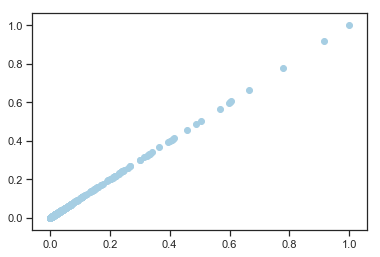

In [742]:
plt.scatter(df_Carib['pr05'], df_Carib85['pr05'])

In [751]:
df_Carib.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib.csv')
df_Carib85.to_csv('./Manuscript_notebooks/python_to_R_csv/df_Carib85.csv')

# Southwest Pacific

In [671]:
#! Load input files
SST_45 = np.load("./SouthwestPacific/input/SWP_SST_45_yearly.npy")
SST_85 = np.load("./SouthwestPacific/input/SWP_SST_85_yearly.npy")
D = np.load("./SouthwestPacific/input/D_SWP_2001_revised.npy").T
Area = np.load("./SouthwestPacific/input/SWP_reef_area.npy")
N0 = np.load("./output/SWP/N_hindcast_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
N1 = np.load("./output/SWP/N_forecast1_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
N2 = np.load("./output/SWP/N_forecast2_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
N45 = np.concatenate((N0,N1),axis=0)
N85 = np.concatenate((N0,N2),axis=0)
Z0 = np.load("./output/SWP/Z_hindcast_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/SWP/Z_forecast1_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
Z2 = np.load("./output/SWP/Z_forecast2_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
Z45 = np.concatenate((Z0,Z1),axis=0)
Z85 = np.concatenate((Z0,Z2),axis=0)
egvec_cent = np.load("./patch_metrics/SWP_egvec.npy")
bw_cent = np.load("./patch_metrics/SWP_bw.npy")
year_H = np.load("./output/SWP/year_hindcast_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
year_F = np.load("./output/SWP/year_forecast1_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
year_F2 = np.load("./output/SWP/year_forecast2_SWP_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
year = np.concatenate((year_H,year_F+148),axis=0)
year2 = np.concatenate((year_H,year_F2+148),axis=0)
region = [2] * 583

In [672]:
# RCP 4.5

# Trait Mismatch Calculation

SST = SST_45
N = N45
Z = Z45

mismatch_ts1 = np.zeros((SST.shape))
for j in np.arange(0,SST.shape[1]):#For each time step
    for i in np.arange(0,SST.shape[0]): #For each site
        delta = SST[:,j] - SST[i,j]
        delta_D = delta*D[i,:] * Area/Area[i]
        delta_ave = delta_D.sum()/D.shape[0]
        mismatch_ts1[i,j] = delta_ave

ITM = np.mean(mismatch_ts1[:,139:149], axis = 1)

# pr05 calculation

pr05 = np.zeros((SST.shape[0]))
for i in np.arange(0,SST.shape[0]): #For each site
    delta = np.mean(SST[:,139:149], axis=1) - np.mean(SST[i,139:149])
    ID = np.where(delta >= 0.5)
    D_input = D[i,:]
    D_sum = D_input.sum()
    D_sum_ID = D_input[ID].sum()
    pr05[i] = D_sum_ID/D_sum

print pr05.shape

LR = []
SR = []
DS = []
for i in np.arange(0,583): # 0 to number of sites in region (423,583,2083)
    LR.append(D[i,i]/D[i,:].sum())
    SR.append(D[i,i]/D[:,i].sum())
    DS.append(D[i,:].sum())

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

index1 = long(np.where(year == find_nearest(year,138))[0][0])
index2 = long(np.where(year == find_nearest(year,148))[0][0])
index3 = long(np.where(year == find_nearest(year,420))[0][0])
index4 = long(np.where(year == find_nearest(year,430))[0][0])
index5 = long(np.where(year2 == find_nearest(year2,420))[0][0])
index6 = long(np.where(year2 == find_nearest(year2,430))[0][0])

print index1, index2, index3, index4, index5, index6

iSST45 = np.mean(SST_45[:,index1:index2], axis = 1)
iSST85 = np.mean(SST_85[:,index1:index2], axis = 1)
delta_SST45 = np.mean(SST_45[:,index3:index4], axis = 1) - np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST85 = np.mean(SST_85[:,index5:index6], axis = 1) - np.mean(SST_85[:,index1:index2], axis = 1)

N = N45
N_all = N[:,:,0]+N[:,:,1]
min_cover = N_all.min(axis = 0)
N = N85
N_all = N[:,:,0]+N[:,:,1]
min_cover85 = N_all.min(axis = 0)

columns_order = ['iSST', 'deltaSST','LR', 'SR', 'DS', 'bw_cent', 'egvec_cent','ITM','pr05','Area','region','min_cover']

df_SWP = pd.DataFrame({'deltaSST': delta_SST45, 'iSST': iSST45,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover, 'pr05': pr05}, columns = columns_order )
df_SWP85 = pd.DataFrame({'deltaSST': delta_SST85, 'iSST': iSST85,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM85, 'region': region, 'Area': Area, 'min_cover': min_cover85, 'pr05': pr05_85}, columns = columns_order )


df_SWP.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP_b0_v0.csv')
df_SWP.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP85_b0_v0.csv')

(583,)
138 148 421 430 421 430


# Coral Triangle

In [693]:
#! Load input files
SST_45 = np.load("./CoralTriangle/input/Indonesia_SST_45_yearly_obs_2083.npy")
SST_85 = np.load("./CoralTriangle/input/Indonesia_SST_85_yearly_obs_2083.npy")
D = np.load("./CoralTriangle/input/D_Indo_2083_diag.npy").T
Area = np.load("./CoralTriangle/input/Indonesia_reef_area_2083.npy")
N0 = np.load("./output/CT/N_hindcast_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
N1 = np.load("./output/CT/N_forecast1_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
N2 = np.load("./output/CT/N_forecast2_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
N45 = np.concatenate((N0,N1),axis=0)
N85 = np.concatenate((N0,N2),axis=0)
Z0 = np.load("./output/CT/Z_hindcast_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
Z1 = np.load("./output/CT/Z_forecast1_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
Z2 = np.load("./output/CT/Z_forecast2_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
Z45 = np.concatenate((Z0,Z1),axis=0)
Z85 = np.concatenate((Z0,Z2),axis=0)
egvec_cent = np.load("./patch_metrics/Indo_egvec.npy")
bw_cent = np.load("./patch_metrics/Indo_bw.npy")
year_H = np.load("./output/CT/year_hindcast_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_H_0.npy")
year_F = np.load("./output/CT/year_forecast1_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_45_0.npy")
year_F2 = np.load("./output/CT/year_forecast2_CT_beta_0.0_V_0.0_mpa_none0.0_algmax_1.0_85_0.npy")
year = np.concatenate((year_H,year_F+148),axis=0)
year2 = np.concatenate((year_H,year_F2+148),axis=0)
region = [3] * 2083 # 1 x 423 = Caribbean, 2 x 583 = SWP, 3 x 2083 = CT

In [694]:
index1 = long(np.where(year == find_nearest(year,138))[0][0])
index2 = long(np.where(year == find_nearest(year,148))[0][0])
index3 = long(np.where(year == find_nearest(year,420))[0][0])
index4 = long(np.where(year == find_nearest(year,430))[0][0])
index5 = long(np.where(year2 == find_nearest(year2,420))[0][0])
index6 = long(np.where(year2 == find_nearest(year2,430))[0][0])

print index1, index2, index3, index4, index5, index6

iSST = np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST45 = np.mean(SST_45[:,index3:index4], axis = 1) - np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST85 = np.mean(SST_85[:,index5:index6], axis = 1) - np.mean(SST_85[:,index1:index2], axis = 1)

138 148 421 430 421 430


In [695]:
delta_SST45

array([1.11944834, 1.13315033, 1.01648089, ..., 1.18693054, 1.19166072,
       1.20169051])

In [691]:
# RCP 4.5

# Trait Mismatch Calculation

SST = SST_45
N = N45
Z = Z45

mismatch_ts1 = np.zeros((SST.shape))
for j in np.arange(0,SST.shape[1]):#For each time step
    for i in np.arange(0,SST.shape[0]): #For each site
        delta = SST[:,j] - SST[i,j]
        delta_D = delta*D[i,:] * Area/Area[i]
        delta_ave = delta_D.sum()/D.shape[0]
        mismatch_ts1[i,j] = delta_ave

ITM = np.mean(mismatch_ts1[:,139:149], axis = 1)

# pr05 calculation

pr05 = np.zeros((SST.shape[0]))
for i in np.arange(0,SST.shape[0]): #For each site
    delta = np.mean(SST[:,139:149], axis=1) - np.mean(SST[i,139:149])
    ID = np.where(delta >= 0.5)
    D_input = D[i,:]
    D_sum = D_input.sum()
    D_sum_ID = D_input[ID].sum()
    pr05[i] = D_sum_ID/D_sum


print pr05.shape

LR = []
SR = []
DS = []
for i in np.arange(0,2083): # 0 to number of sites in region (423,583,2083)
    LR.append(D[i,i]/D[i,:].sum())
    SR.append(D[i,i]/D[:,i].sum())
    DS.append(D[i,:].sum())

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

index1 = long(np.where(year == find_nearest(year,138))[0][0])
index2 = long(np.where(year == find_nearest(year,148))[0][0])
index3 = long(np.where(year == find_nearest(year,420))[0][0])
index4 = long(np.where(year == find_nearest(year,430))[0][0])
index5 = long(np.where(year2 == find_nearest(year2,420))[0][0])
index6 = long(np.where(year2 == find_nearest(year2,430))[0][0])

print index1, index2, index3, index4, index5, index6

iSST45 = np.mean(SST_45[:,index1:index2], axis = 1)
iSST85 = np.mean(SST_85[:,index1:index2], axis = 1)
delta_SST45 = np.mean(SST_45[:,index3:index4], axis = 1) - np.mean(SST_45[:,index1:index2], axis = 1)
delta_SST85 = np.mean(SST_85[:,index5:index6], axis = 1) - np.mean(SST_85[:,index1:index2], axis = 1)

N = N45
N_all = N[:,:,0]+N[:,:,1]
min_cover = N_all.min(axis = 0)
N = N85
N_all = N[:,:,0]+N[:,:,1]
min_cover85 = N_all.min(axis = 0)

columns_order = ['iSST', 'deltaSST','LR', 'SR', 'DS', 'bw_cent', 'egvec_cent','ITM','pr05','Area','region','min_cover']

df_CT = pd.DataFrame({'deltaSST': delta_SST45, 'iSST': iSST,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover, 'pr05': pr05}, columns = columns_order )
df_CT85 = pd.DataFrame({'deltaSST': delta_SST85, 'iSST': iSST,'LR': LR, 'SR': SR, 'DS': DS, 'bw_cent': bw_cent, 'egvec_cent': egvec_cent,'ITM':ITM, 'region': region, 'Area': Area, 'min_cover': min_cover85, 'pr05': pr05}, columns = columns_order )


df_CT.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT_b0_v0.csv')
df_CT85.to_csv('./Manuscript_notebooks/python_to_R_csv/df_CT85_b0_v0.csv')

(2083,)
138 148 421 430 421 430


In [467]:
len(rank_SST45)

423

In [445]:
N = N45
index1 = np.percentile(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0), 15)
index3 = np.where(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0)<index1)
poor = np.asarray(index3[0])

index1 = np.percentile(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0), 42.5)
index2 = np.percentile(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0), 57.5)
index3 = np.where(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0)>index1)
index4 = np.where(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0)<index2)
intermediate = np.intersect1d(index3,index4)

index1 = np.percentile(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0), 85)
index3 = np.where(N[:,:,0].min(axis = 0)+N[:,:,1].min(axis = 0)>index1)
resilient = np.asarray(index3[0])

print len(poor)
print len(intermediate)
print len(resilient)

64
63
64


In [446]:
N = N45

index1 = np.percentile(N[200,:,0]+N[200,:,1], 15)
index3 = np.where(N[200,:,0]+N[200,:,1]<index1)
poor = np.asarray(index3[0])

index1 = np.percentile(N[200,:,0]+N[200,:,1], 42.5)
index2 = np.percentile(N[200,:,0]+N[200,:,1], 57.5)
index3 = np.where(N[200,:,0]+N[200,:,1]>index1)
index4 = np.where(N[200,:,0]+N[200,:,1]<index2)
intermediate = np.intersect1d(index3,index4)

index1 = np.percentile(N[200,:,0]+N[200,:,1], 85)
index3 = np.where(N[200,:,0]+N[200,:,1]>index1)
resilient = np.asarray(index3[0])

print len(poor)
print len(intermediate)
print len(resilient)

64
63
64


In [447]:
index1 = np.percentile(N[200,:,0]+N[200,:,1], 10)
index3 = np.where(N[200,:,0]+N[200,:,1]<index1)
poor = np.asarray(index3[0])

index1 = np.percentile(N[200,:,0]+N[200,:,1], 45)
index2 = np.percentile(N[200,:,0]+N[200,:,1], 55)
index3 = np.where(N[200,:,0]+N[200,:,1]>index1)
index4 = np.where(N[200,:,0]+N[200,:,1]<index2)
intermediate = np.intersect1d(index3,index4)

index1 = np.percentile(N[200,:,0]+N[200,:,1], 90)
index3 = np.where(N[200,:,0]+N[200,:,1]>index1)
resilient = np.asarray(index3[0])

print len(poor)
print len(intermediate)
print len(resilient)

43
43
43


([<matplotlib.axis.XTick at 0x1a178e0a50>,
 <a list of 5 Text xticklabel objects>)

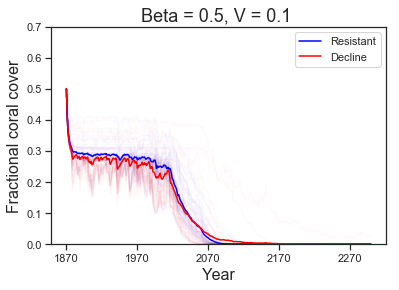

In [489]:
yearlabs = ['1870','1970','2070','2170','2270']
years = [0,100,200,300,400]
plt.plot(year, (N[:,resilient,0]+N[:,resilient,1]), color='blue', alpha = 0.02);
#plt.plot(year, (N[:,intermediate,0]+N[:,intermediate,1]), color='orange', alpha = 0.02);
plt.plot(year, (N[:,poor,0]+N[:,poor,1]), color='red', alpha = 0.02);
plt.plot(year, (N[:,resilient,0]+N[:,resilient,1]).mean(axis=1), color='blue', label = "Resistant");
#plt.plot(year, (N[:,intermediate,0]+N[:,intermediate,1]).mean(axis=1), color='orange', label = "Recover");
plt.plot(year, (N[:,poor,0]+N[:,poor,1]).mean(axis=1), color='red', label = "Decline");
plt.title("Beta = 0.5, V = 0.1 ", fontsize=18)
plt.ylabel("Fractional coral cover", fontsize=16)
plt.xlabel("Year", fontsize=16)
#plt.legend(["Resilient sites", "Intermediate sites", "Poor sites"])
plt.legend()
plt.ylim([0,0.7])
plt.xticks(years, yearlabs)
#plt.savefig('./resiliency_total.png',dpi = 330, bbox_inches='tight')

In [331]:
df_CT85.at[poor,'resiliency'] = 1
df_CT85.at[intermediate,'resiliency'] = 2
df_CT85.at[resilient,'resiliency'] = 3

In [508]:
df_SWP.to_csv('./Manuscript_notebooks/python_to_R_csv/df_SWP_pr05_v0.1.csv')

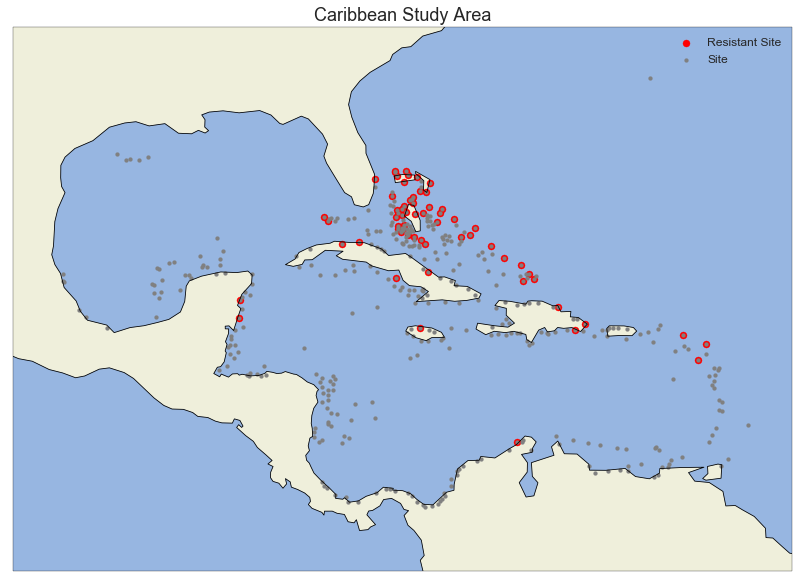

In [677]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

#lat = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
#lon = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")

lats = np.genfromtxt("./Caribbean/input/Caribbean_lat.csv")
lons = np.genfromtxt("./Caribbean/input/Caribbean_lon.csv")
#lons = lons - 270

def main():
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-100, -57, 5, 35], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    #ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
   # states_provinces = cfeature.NaturalEarthFeature(
    #    category='cultural',
     #   name='admin_1_states_provinces_lines',
      #  scale='50m',
       # facecolor='none')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE, edgecolor = 'black', linewidth = 0.8)
    #ax.add_feature(states_provinces, edgecolor='gray')
    
    plt.scatter(lons[resilient], lats[resilient], c = 'red', s = 50, label = 'Resistant Site')
    plt.scatter(lons, lats, c = 'gray', s = 15, label = 'Site')
    plt.legend(fontsize = 12)
    plt.title('Caribbean Study Area', fontsize = 18)
    #plt.savefig('./output/Caribbean/Caribbean_site_map.png',dpi=300, bbox_inches='tight')
    
if __name__ == '__main__':
    main()

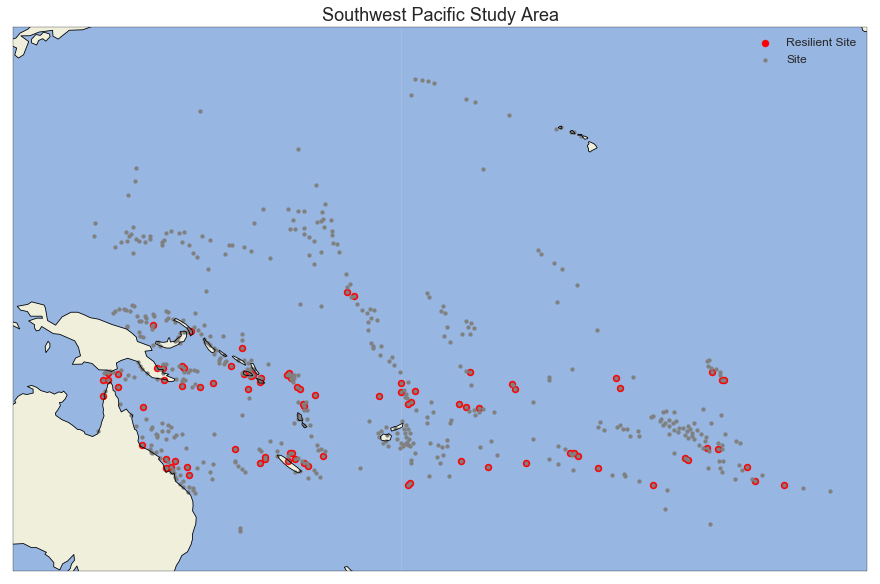

In [450]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

lats = np.genfromtxt("./SouthwestPacific/input/SWP_lat.csv")
lons = np.genfromtxt("./SouthwestPacific/input/SWP_lon.csv")

def main():
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(180))
    ax.set_extent([130,240, -35, 35], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    #ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
   # states_provinces = cfeature.NaturalEarthFeature(
    #    category='cultural',
     #   name='admin_1_states_provinces_lines',
      #  scale='50m',
       # facecolor='none')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE, edgecolor = 'black', linewidth = 0.8)
    #ax.add_feature(states_provinces, edgecolor='gray')
    plt.scatter(lons[resilient]+180, lats[resilient], c = 'red', s = 50, label = 'Resistant Site')
    plt.scatter(lons+180, lats, c = 'gray', s = 15, label = 'Site')
    plt.legend(fontsize = 12)
    plt.title('Southwest Pacific Study Area', fontsize = 18)
   # plt.savefig('./output/SWP/SWP_site_map.png',dpi=300, bbox_inches='tight')
    
if __name__ == '__main__':
    main()

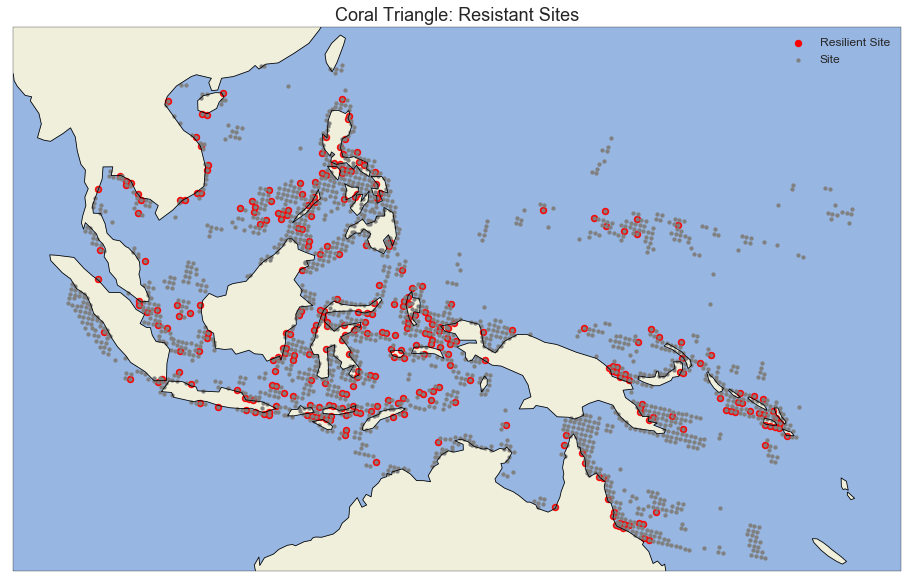

In [322]:
N45_2018 = N1[132,:,0]+N1[132,:,1]
lats = np.load("./CoralTriangle/input/Data_Lat_wholeCT_2083.npy")
lons = np.load("./CoralTriangle/input/Data_Lon_wholeCT_2083.npy")
lats = lats[:-1]
lons = lons[:-1]


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

def main():
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([92,172, -23, 26], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    #ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
   # states_provinces = cfeature.NaturalEarthFeature(
    #    category='cultural',
     #   name='admin_1_states_provinces_lines',
      #  scale='50m',
       # facecolor='none')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE, edgecolor = 'black', linewidth = 0.8)
    #ax.add_feature(states_provinces, edgecolor='gray')
    plt.scatter(lons[resilient], lats[resilient], c = 'red', s = 50, label = 'Resistant Site')
    plt.scatter(lons, lats, c = 'gray', s = 15, label = 'Site')
    plt.legend(fontsize = 12)
    plt.title('Coral Triangle: Resistant Sites', fontsize = 18)
    #plt.savefig('./output/CT/CT_site_map.png',dpi=300, bbox_inches='tight')
    
if __name__ == '__main__':
    main()


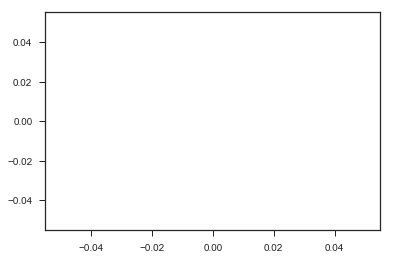

In [124]:
plt.scatter(delta_SST45, df_CT2['resiliency'])